In [52]:
# 히스토그램 : 계급별로 나눠서 갯수를 확인 하는 것
# bins : 구간을 나누는 기준을 설정 할 수 있음
# 연속형 데이터를 범주형 데이터로 분류하여 새로운  피처를 생성 ---> 피처 엔지니어링
# 데이터 분석 또는 학습을 할떄 다양한 데이터의 특성을 찾아서 추가 

In [53]:
import pandas as pd
import numpy as np



df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.head() # head를 통해 데이터 확인







,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [54]:
# df.info()
# 3번 float가 아닌 object로 나왔다는건 이상한 아이 찾아야함
df[3].unique()


for i, val in enumerate(df[3]):
    try:
        float(val.strip())
    except Exception as e:
        print(i, val)


32 ?
126 ?
330 ?
336 ?
354 ?
374 ?


In [55]:
# df[3].replace('?',pd.NA).isna().sum()

df[3] = df[3].replace('?',pd.NA)
df.info

<bound method DataFrame.info of         0  1      2      3       4     5   6  7                          8
0    18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1    15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2    18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3    16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4    17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
..    ... ..    ...    ...     ...   ...  .. ..                        ...
393  27.0  4  140.0  86.00  2790.0  15.6  82  1            ford mustang gl
394  44.0  4   97.0  52.00  2130.0  24.6  82  2                  vw pickup
395  32.0  4  135.0  84.00  2295.0  11.6  82  1              dodge rampage
396  28.0  4  120.0  79.00  2625.0  18.6  82  1                ford ranger
397  31.0  4  119.0  82.00  2720.0  19.4  82  1                 chevy s-10

[398 rows x 9 columns]>

C:\Users\playdata\AppData\Local\Temp\ipykernel_24884\947956498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[3] = df[3].astype('float') # float로 바꾼 후 df[3]에다가 다시 덮어씌워줌


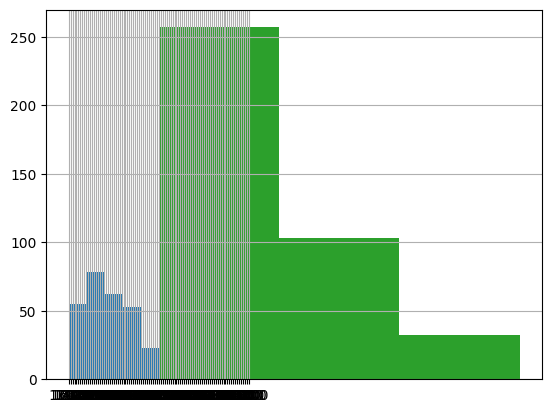

In [56]:
# 결측치 제거
df = df.dropna()
df[3].hist()
# 구간을 왜 못 나눴을까..
# 수치형데이터를 문자열데이터로 바꿨기떄문에 type을 바꿔주면 됌
df[3] = df[3].astype('float') # float로 바꾼 후 df[3]에다가 다시 덮어씌워줌 
df[3].hist()

a = df[3].hist(bins=3) # 3으로 나눔
# 구간 폭이 일정함.

In [57]:
# 구간별로 값을 알아야하잖아 
# 구간을 직접 지정 pd.cut  사용 함. 확신이 들때 domain 지식이 있을때. 사용하는것임
# 마력 lower 와 medium / hight 3개로 나눌 수 있잖슴
# cut 으로 출력해봄

import pandas as pd
import numpy as np

cnt , bins =np.histogram(df[3],bins = 3)
print(cnt,bins)   # bins = [ 0,15,25,100 ] # <- 구간값을 임의로 바꿔줄 수 없음
labels = ['저출력','보통','고출력']

df['power'] = pd.cut( df[3] , bins = bins , labels = labels )
df.head()
# 위 같은 방법 1



[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


C:\Users\playdata\AppData\Local\Temp\ipykernel_24884\2256800893.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power'] = pd.cut( df[3] , bins = bins , labels = labels )


,0,1,2,3,4,5,6,7,8,power
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,보통
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,보통
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,보통
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,보통
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,보통


In [58]:
# pd.qcut 분위수기반으로 동일한 개수로 분할
# 각 구간별 샘플 개수가 비슷
# 구간 폭이 일정하지 않음
# qcut 으로 출력해보겠삼
import pandas as pd
import numpy as np

labels = ['저출력','보통','고출력']
df['qpower'] = pd.qcut(df[3],q = 3,labels = labels)
df.head()


C:\Users\playdata\AppData\Local\Temp\ipykernel_24884\2141561475.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['qpower'] = pd.qcut(df[3],q = 3,labels = labels)


,0,1,2,3,4,5,6,7,8,power,qpower
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,보통,고출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,보통,고출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,보통,고출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,보통,고출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,보통,고출력


C:\Users\playdata\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\playdata\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\playdata\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\playdata\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\playdata\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWa

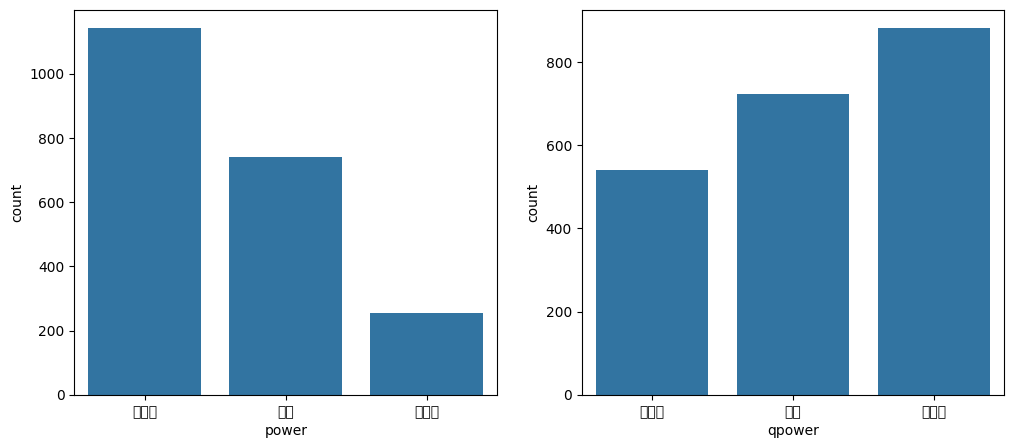

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=df,x='power',ax=ax[0])
sns.countplot(data=df,x='qpower',ax=ax[1])
plt.show()





<Axes: >

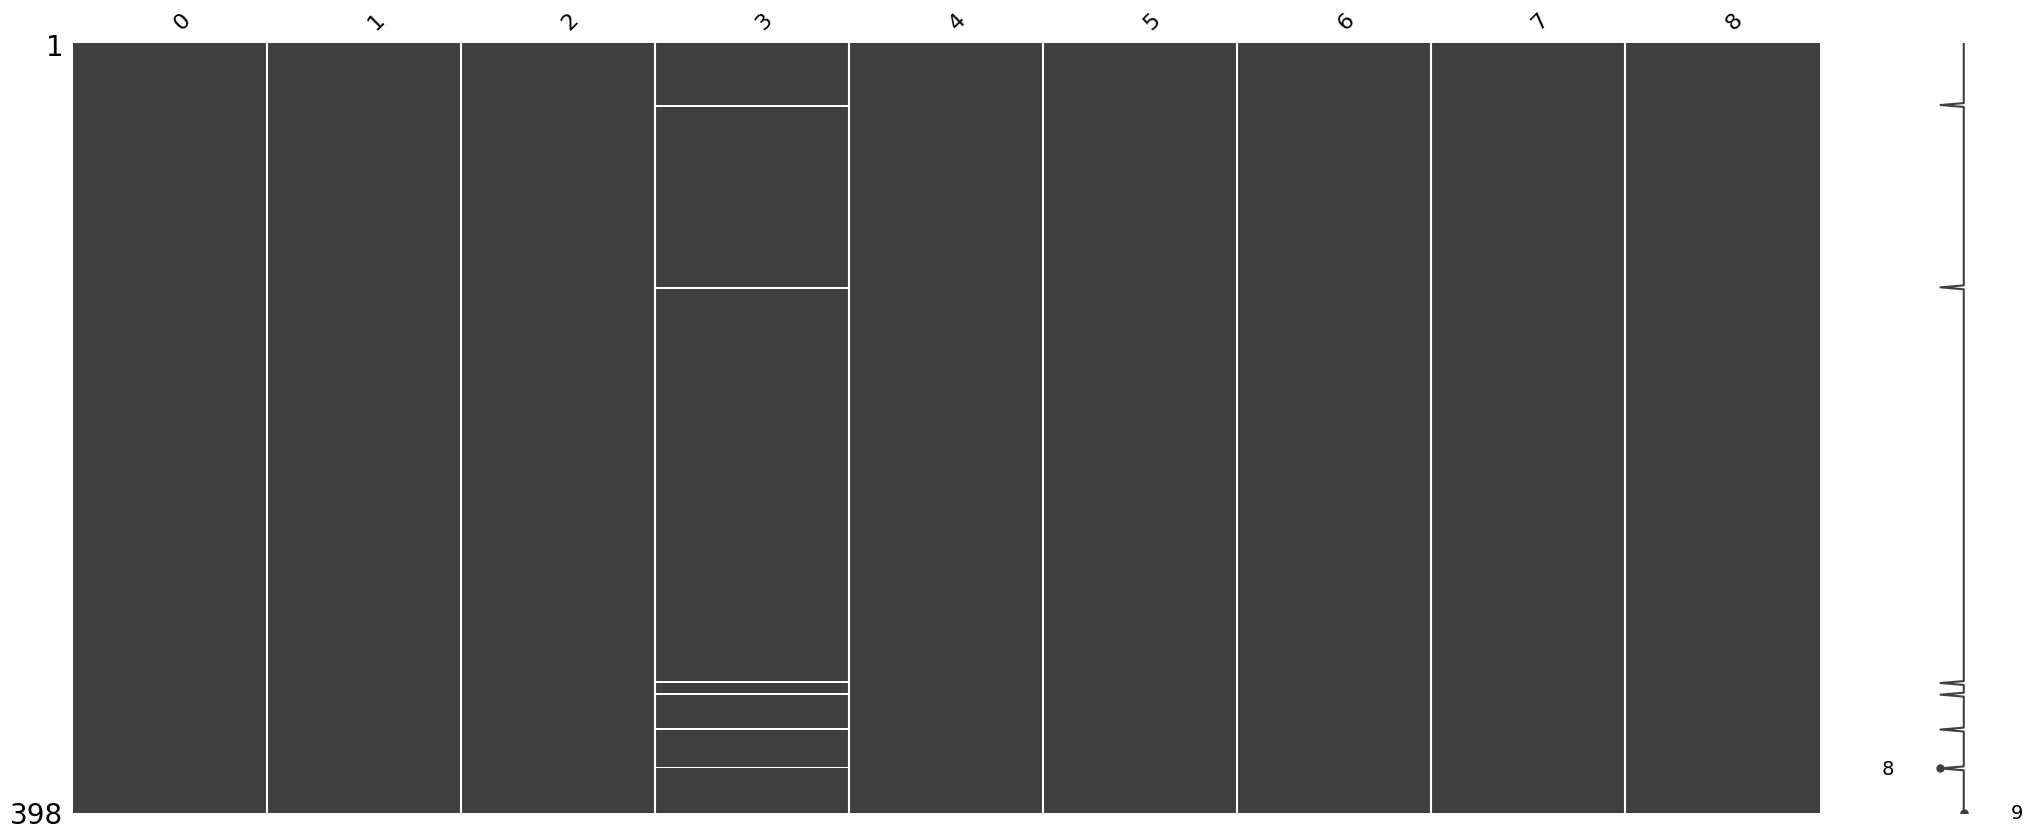

In [ ]:
import missingno as msno # 결측치 눈으로 확인하는 라이브러리
msno.matrix(df) # 6개 결측치 확인됨.

In [ ]:
# df[3][1] # 문자열로 되어 있는 애들 중에 이상한 애 찾아야함

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers) 

[ 46.         107.33333333 168.66666667 230.        ]


In [ ]:
# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 

# horsepower 열, hp_bin 열의 첫 15행을 출력
df[['horsepower', 'hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력
